In [12]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [29]:
# Define the adjacency matrix for the graph with 5 nodes
adj_matrix = np.array([[0, 1, 0, 0, 1, 1],
                       [1, 0, 0, 1, 1, 0],
                       [0, 0, 0, 1, 1, 0],
                       [0, 1, 1, 0, 0, 0],
                       [1, 1, 1, 0, 0, 1],
                       [1, 0, 0, 0, 1, 0]])

# Define the number of nodes
num_nodes = 6

# Define the decision variable
#Boolean variables y[j] that colour j is used or not
#Assumption: we have n number of colours available where n = nodes
y = cp.Variable(num_nodes, boolean=True)

#Boolear variable array X[i,j] that node i is coloured with colour j or not
x = cp.Variable((6,num_nodes), integer=True)

# Define the objective function
obj = cp.Minimize(cp.sum(y))

# Define the constraints

#This allows to have only one color per node
constraints = []
for i in range(num_nodes):
    for j in range(num_nodes):
        constraints.append(x[i, j] >= 0)
    constraints.append(cp.sum(x[i, :]) == 1)

#This allows the adjacent node to have different colors
for i in range(num_nodes):
    for j in range(num_nodes):
        if adj_matrix[i, j] == 1:
            for k in range(num_nodes):
                constraints.append(x[i, k] + x[j, k] <= 1)

#This constraint is indirectly ensuring that if a colour is used to colour a node than it should reflect in the array y.
constraints.append(cp.sum(x, axis=0) <= num_nodes * y)

# Solve the problem
problem = cp.Problem(obj, constraints)
problem.solve(solver=cp.GLPK_MI)

# Print the solution
print("Minimum number of colors:", int(obj.value))
print("Node colors:")
print(np.argmax(x.value, axis=1))


Minimum number of colors: 3
Node colors:
[2 3 3 2 4 3]


<function matplotlib.pyplot.show(close=None, block=None)>

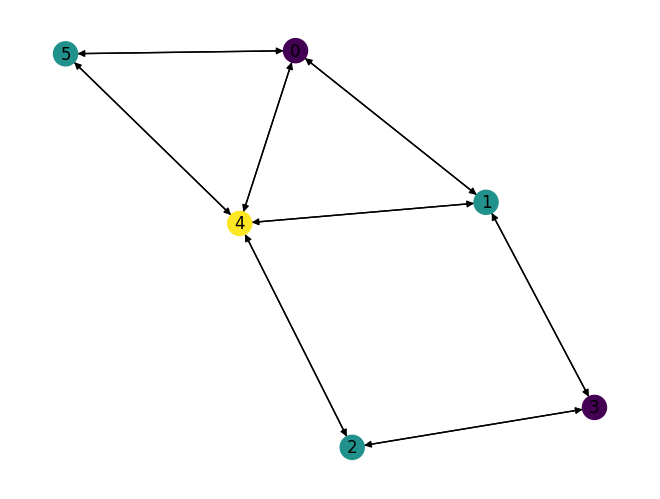

In [32]:
G = nx.DiGraph(adj_matrix)
color_map=np.argmax(x.value,axis=1)
nx.draw(G,with_labels=True,node_color=color_map)
plt.show